In [100]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from zipfile import ZipFile
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [101]:
df = pd.read_csv('selected_factor_and_return.csv')
df.set_index(['date', 'Ticker'], inplace=True)

if "Unnamed: 0" in df.columns:
  df.drop("Unnamed: 0", axis=1, inplace=True)

df.head()


,,Size,Growth_rev,Growth_sales,Liquidity,cpv_1mo,cpv_1w,mr_1w,daily_return
date,Ticker,,,,,,,,
2005-03-02,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,NaN,-0.500000,-0.500000,-0.007344
2005-03-03,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,0.220294,-0.500000,0.025363,0.016030
2005-03-04,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.413597,-0.460642,-0.393291,-0.001214
2005-03-07,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.289229,-0.500000,-0.018306,0.001215
2005-03-08,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.402915,-0.500000,-0.441406,0.002427


In [102]:
df.tail()

,,Size,Growth_rev,Growth_sales,Liquidity,cpv_1mo,cpv_1w,mr_1w,daily_return
date,Ticker,,,,,,,,
2024-02-22,4887.T,0.000682,0.025796,-0.208486,0.294093,-0.416995,0.500000,0.500000,-0.003213
2024-02-26,4887.T,0.000682,0.025796,-0.208486,0.294093,-0.445481,0.500000,0.030160,-0.012723
2024-02-27,4887.T,0.000682,0.025796,-0.208486,0.294093,-0.489727,0.500000,-0.394372,-0.010309
2024-02-28,4887.T,0.000682,0.025796,-0.208486,0.294093,-0.463301,0.300501,0.500000,-0.001042
2024-02-29,4887.T,0.000682,0.025796,-0.208486,0.294093,-0.457932,0.500000,0.500000,-0.001738


Most of the columns contain missing values. Below are the top ten features with the most missing values.

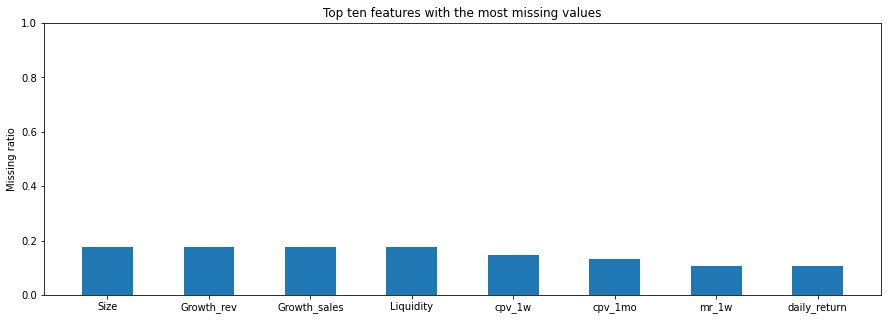

In [103]:
fig, ax = plt.subplots(figsize = (15, 5))
df_na = (df.isnull().sum() / len(df))
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)[: 10]
ax.bar(range(df_na.size), df_na, width = 0.5)
plt.xticks(range(df_na.size), df_na.index, rotation = 0)
plt.ylim([0, 1])
plt.ylabel('Missing ratio')
plt.show()

In [104]:
df.head()

,,Size,Growth_rev,Growth_sales,Liquidity,cpv_1mo,cpv_1w,mr_1w,daily_return
date,Ticker,,,,,,,,
2005-03-02,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,NaN,-0.500000,-0.500000,-0.007344
2005-03-03,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,0.220294,-0.500000,0.025363,0.016030
2005-03-04,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.413597,-0.460642,-0.393291,-0.001214
2005-03-07,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.289229,-0.500000,-0.018306,0.001215
2005-03-08,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.402915,-0.500000,-0.441406,0.002427


In [105]:
stocks = df.groupby('Ticker')
stocks.get_group('4151.T')


,,Size,Growth_rev,Growth_sales,Liquidity,cpv_1mo,cpv_1w,mr_1w,daily_return
date,Ticker,,,,,,,,
2005-03-02,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,NaN,-0.500000,-0.500000,-0.007344
2005-03-03,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,0.220294,-0.500000,0.025363,0.016030
2005-03-04,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.413597,-0.460642,-0.393291,-0.001214
2005-03-07,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.289229,-0.500000,-0.018306,0.001215
2005-03-08,4151.T,0.550627,0.676392,-6.303325e-17,-0.368775,-0.402915,-0.500000,-0.441406,0.002427
...,...,...,...,...,...,...,...,...,...
2024-02-22,4151.T,0.932595,-0.075387,1.094734e-01,-0.494542,-0.500000,-0.500000,-0.461916,-0.001910
2024-02-26,4151.T,0.932595,-0.075387,1.094734e-01,-0.494542,-0.500000,-0.113901,-0.218161,0.014962
2024-02-27,4151.T,0.932595,-0.075387,1.094734e-01,-0.494542,-0.500000,-0.447035,-0.087193,0.010970


In [106]:
# get list of features and target column
features_cols = df.columns[1:-1]
target_col = df.columns[-1]

In [107]:
target = df[target_col]
has_nan = target.isnull().values.any()
print("Contains NaN:", has_nan)

has_inf = target.isin([np.inf, -np.inf]).values.any()
print("Contains infinite values:", has_inf)

Contains NaN: True
Contains infinite values: False


In [108]:
mean_ret = target.mean()
df[target_col].fillna(mean_ret, inplace=True)
has_nan = target.isnull().values.any()
print("Contains NaN:", has_nan)

Contains NaN: False


In [109]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train_df  = df.iloc[:valid_split_idx].copy()
valid_df  = df.iloc[valid_split_idx+1:test_split_idx].copy()
test_df   = df.iloc[test_split_idx+1:].copy()


train_df.tail()

,,Size,Growth_rev,Growth_sales,Liquidity,cpv_1mo,cpv_1w,mr_1w,daily_return
date,Ticker,,,,,,,,
2010-10-18,4559.T,-0.718262,-0.505072,0.0,-1.273525,0.500000,-0.311640,0.500000,0.015756
2010-10-19,4559.T,-0.718262,-0.505072,0.0,-1.273525,0.250193,0.500000,0.233453,-0.005171
2010-10-20,4559.T,-0.718262,-0.505072,0.0,-1.273525,0.161892,0.374744,0.407534,-0.011435
2010-10-21,4559.T,-0.718262,-0.505072,0.0,-1.273525,0.162806,0.449682,0.500000,0.014721
2010-10-22,4559.T,-0.718262,-0.505072,0.0,-1.273525,0.022652,0.172140,0.023163,0.023834


In [110]:

y_train = train_df[target_col].copy()
X_train = train_df.drop([target_col], 1)

y_valid = valid_df[target_col].copy()
X_valid = valid_df.drop([target_col], 1)

y_test  = test_df[target_col].copy()
X_test  = test_df.drop([target_col], 1)

X_train.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 128173 entries, ('2005-03-02', '4151.T') to ('2010-10-22', '4559.T')
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Size          123594 non-null  float64
 1   Growth_rev    123594 non-null  float64
 2   Growth_sales  123594 non-null  float64
 3   Liquidity     123594 non-null  float64
 4   cpv_1mo       123001 non-null  float64
 5   cpv_1w        120423 non-null  float64
 6   mr_1w         126731 non-null  float64
dtypes: float64(7)
memory usage: 7.4+ MB


The stock returns in the following two days are split to two target variables.

In [111]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV


In [112]:
%%time

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.005, 'learning_rate': 0.005, 'max_depth': 8, 'n_estimators': 400, 'random_state': 42}
Best validation score = 0.0001986864342933492
CPU times: user 1h 45min 57s, sys: 8min 43s, total: 1h 54min 41s
Wall time: 17min 46s


In [113]:
%%time

model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

CPU times: user 18.6 s, sys: 903 ms, total: 19.5 s
Wall time: 3.15 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.005, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

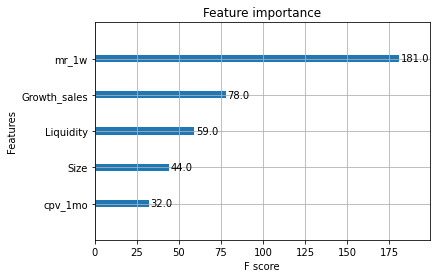

In [114]:
plot_importance(model)


In [132]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)}')
print(f'y_pred = {y_pred}')

y_true = [ 0.00043552  0.00043552  0.00043552 ... -0.01030932 -0.00104161
 -0.001738  ]
y_pred = [0.00037381 0.00037381 0.00037381 ... 0.00016888 0.00065272 0.00065272]


In [133]:
from sklearn.metrics import mean_squared_error

print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')


mean_squared_error = 0.00028864967895027695
